<a href="https://colab.research.google.com/github/NIKHIL-SEKHAR/AI_ML_COURSE_ICTAK_NIKHIL/blob/main/Manappuram_Session21_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

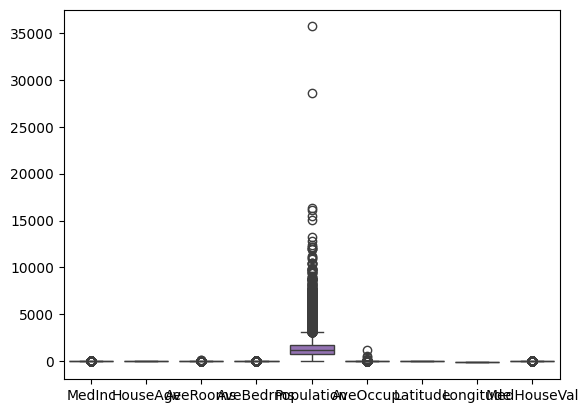

In [19]:
import seaborn as sns
sns.boxplot(df)

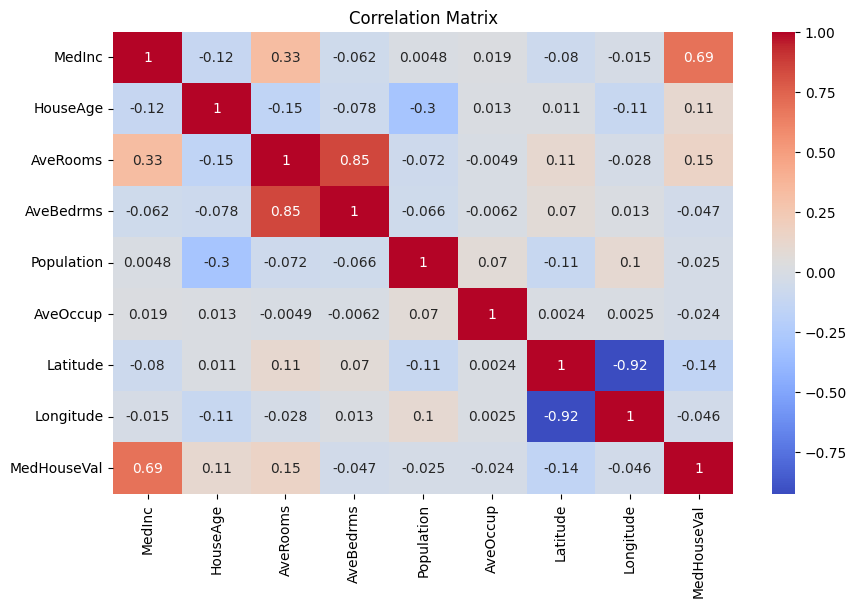

In [20]:
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [8]:
df.corr()['MedHouseVal'].sort_values(ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


In [9]:
# X are the features and y is the target
X =df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [10]:
# Standard Scaling -- Data leakage
# After train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

y_pred = model.predict(X_test_scaled)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2:",r2_score(y_test,y_pred))

MAE: 0.5332001304956565
MSE: 0.5558915986952442
RMSE: 0.7455813830127763
R2: 0.575787706032451


In [15]:
print("Enter house details:")

medinc = float(input("Median Income: "))
houseage = float(input("House Age: "))
averooms = float(input("Average Rooms: "))
avbedrms = float(input("Average Bedrooms: "))
population = float(input("Population: "))
avoccup = float(input("Average Occupation: "))
latitude = float(input("Latitude: "))
longitude = float(input("Longitude: "))

Enter house details:
Median Income: 3
House Age: 30
Average Rooms: 2
Average Bedrooms: 1
Population: 20
Average Occupation: 3
Latitude: 37.38
Longitude: -122


In [16]:
user_data = pd.DataFrame([[
    medinc, houseage, averooms, avbedrms, population, avoccup, latitude, longitude
]], columns=X.columns)

In [17]:
user_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.0,30.0,2.0,1.0,20.0,3.0,37.38,-122.0


In [18]:
user_data_scaled = scaler.transform(user_data)

predicted_price = model.predict(user_data_scaled)

print("Predicted Median House Value:", predicted_price[0])
print("Predicted Price (USD):", predicted_price[0] * 100000)

Predicted Median House Value: 2.360894198667829
Predicted Price (USD): 236089.4198667829
